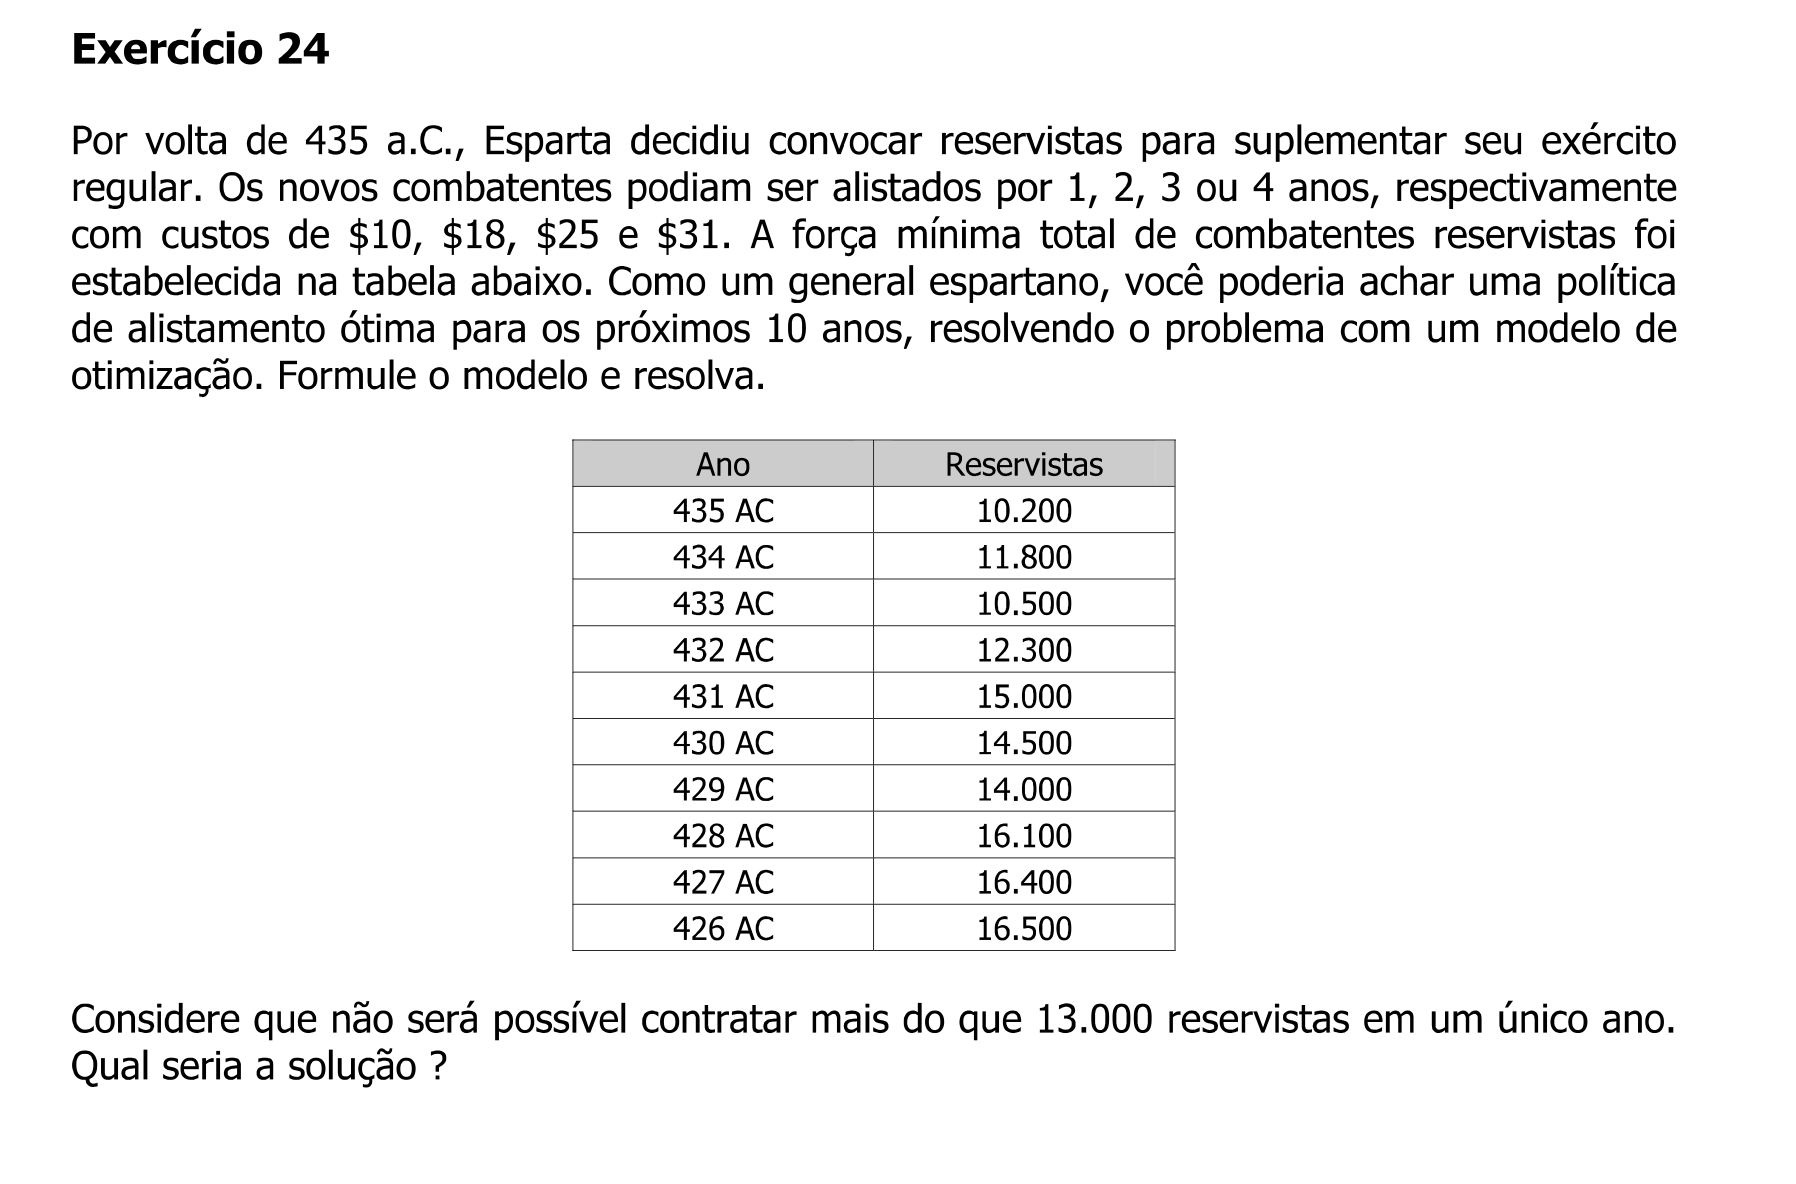

## Modelo 1

### Índice / Conjunto

$J \colon \text{Conjunto total de anos, } J=\{1,2, \ldots, n\}.$

### Parâmetros

$f_j \colon \text{Força mínima total de combatentes no ano }j \in J,$

$P \colon \text{Custo do combatente no primeiro ano de serviço},$

$Q \colon \text{Custo do combatente no segundo ano de serviço},$

$R \colon \text{Custo do combatente no terceiro ano de serviço},$

$S \colon \text{Custo do combatente no quarto ano de serviço},$

$L \colon \text{Quantidade máxima de combatentes contratados por ano}.$

### Variáveis de decisão

$x_j \colon \text{Total de combatentes no primeiro ano, no ano }j \in J,$

$y_j \colon \text{Total de combatentes no segundo ano, no ano }j \in J,$

$v_j \colon \text{Total de combatentes no terceiro ano, no ano }j \in J,$

$w_j \colon \text{Total de combatentes no quarto ano, no ano }j \in J.$


### Formulação matemática

$\text{min }z = \sum\limits_{j \in J} P x_j + \sum\limits_{j \in J} Q y_j + \sum\limits_{j \in J} R v_j + + \sum\limits_{j \in J} S w_j$

sujeito a

$x_j + y_j + v_j + w_j  \geq f_j \;\; \forall j \in J,$

$w_j = v_{j-1} \;\; \forall j \in J \text{, }j \geq 4,$

$w_j = 0 \;\; \forall j \in J \text{, }j < 4,$

$v_j = y_{j-1} \;\; \forall j \in J \text{, }j \geq 3,$

$v_j = 0 \;\; \forall j \in J \text{, }j < 3,$

$y_j = x_{j-1} \;\; \forall j \in J \text{, }j \geq 2,$

$y_j = 0 \;\; \forall j \in J \text{, }j < 2,$

$x_j \leq L,$

$x_j, y_j, v_j, w_j \geq 0.$




In [1]:
# Dados de entrada:

f = [10200, 11800, 10500, 12300, 15000, 14500, 14000, 16100, 16400, 16500]

P = 10

Q = 18

R = 25

S = 31

L = 13000

In [2]:
import pyomo.environ as pyo

modelo = pyo.ConcreteModel()

# Conjunto:
modelo.J = pyo.RangeSet(len(f)) 

# Parâmetros:
modelo.f = pyo.Param(modelo.J, initialize=lambda modelo, j: f[j-1])

# Variáveis de decisão:
modelo.x = pyo.Var(modelo.J, within=pyo.NonNegativeIntegers)
modelo.y = pyo.Var(modelo.J, within=pyo.NonNegativeIntegers)
modelo.v = pyo.Var(modelo.J, within=pyo.NonNegativeIntegers)
modelo.w = pyo.Var(modelo.J, within=pyo.NonNegativeIntegers)

# Função objetivo:
def f_obj(modelo):
    return sum(P * modelo.x[j] for j in modelo.J) + sum(Q * modelo.y[j] for j in modelo.J) + sum(R * modelo.v[j] for j in modelo.J) + sum(S * modelo.w[j] for j in modelo.J)
modelo.obj = pyo.Objective(rule=f_obj, sense=pyo.minimize)


# Restrições:

def f_restr1(modelo, j):
    return modelo.x[j] + modelo.y[j] + modelo.v[j] + modelo.w[j] >= modelo.f[j]
modelo.restr_1 = pyo.Constraint(modelo.J, rule=f_restr1)

def f_restr2(modelo, j):
    if j >= 4:
        return modelo.w[j] == modelo.v[j-1]
    else:
        return modelo.w[j] == 0
modelo.restr_2 = pyo.Constraint(modelo.J, rule=f_restr2)

def f_restr3(modelo, j):
    if j >= 3:
        return modelo.v[j] == modelo.y[j-1]
    else:
        return modelo.v[j] == 0
modelo.restr_3 = pyo.Constraint(modelo.J, rule=f_restr3)

def f_restr4(modelo, j):
    if j >= 2:
        return modelo.y[j] == modelo.x[j-1]
    else:
        return modelo.y[j] == 0
modelo.restr_4 = pyo.Constraint(modelo.J, rule=f_restr4)

def f_restr5(modelo, j):
    return modelo.x[j] <= L
modelo.restr_5 = pyo.Constraint(modelo.J, rule=f_restr5)



In [3]:
result = pyo.SolverFactory('gurobi', solver_io="python").solve(modelo)
print(result)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-06-07
Using license file /Users/acsjunior/gurobi.lic

Problem: 
- Name: unknown
  Lower bound: 2707100.0
  Upper bound: 2707100.0
  Number of objectives: 1
  Number of constraints: 50
  Number of variables: 40
  Number of binary variables: 0
  Number of integer variables: 40
  Number of continuous variables: 0
  Number of nonzeros: 104
  Sense: 1
  Number of solutions: 2
Solver: 
- Name: Gurobi 9.11
  Status: ok
  Wallclock time: 0.010653018951416016
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [4]:
import pandas as pd

df_final = pd.DataFrame({'Ano': [x for x in range(435, 425, -1)]})
df_final['Contratados'] = [int(modelo.x[j]()) for j in modelo.J]
df_final['Segundo_ano'] = [int(modelo.y[j]()) for j in modelo.J]
df_final['Terceiro_ano'] = [int(modelo.v[j]()) for j in modelo.J]
df_final['Quarto_ano'] = [int(modelo.w[j]()) for j in modelo.J]
df_final['Total_combatentes'] = df_final['Contratados'] + df_final['Segundo_ano'] + df_final['Terceiro_ano'] + df_final['Quarto_ano']

In [5]:
df_final

,Ano,Contratados,Segundo_ano,Terceiro_ano,Quarto_ano,Total_combatentes
0,435,10200,0,0,0,10200
1,434,1600,10200,0,0,11800
2,433,500,1600,10200,0,12300
3,432,0,500,1600,10200,12300
4,431,12900,0,500,1600,15000
5,430,1100,12900,0,500,14500
6,429,0,1100,12900,0,14000
7,428,2300,0,1100,12900,16300
8,427,13000,2300,0,1100,16400
9,426,1200,13000,2300,0,16500


In [6]:
print("Custo total:", modelo.obj())

Custo total: 2707100.0
